In [169]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [170]:
import pandas as pd
%matplotlib inline

데이터를 DataFrame에 읽어들임

In [171]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    # 새로 생성하는 항목
    Title = "Title"

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 survived가 없다. (이 데이터를 predict해서 제출해야 함)

In [172]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>

In [173]:
train.info()

print("train count : ", train.shape[0])
print("train arguments : ", train.shape[1])
print("")
for i in range(train.shape[1]):
    print(i, ":", train.columns[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
train count :  891
train arguments :  12

0 : PassengerId
1 : Survived
2 : Pclass
3 : Name
4 : Sex
5 : Age
6 : SibSp
7 : Parch
8 : Ticket
9 : Fare
10 : Cabin
11 : Embarked


### 먼저 비어있는 데이터를 처리해야 한다.
- 너무 많이 빠진 항목이면 제거한다.
- 중요한 항목이라고 판단되는 항목은 데이터를 추정해서 채워 넣도록 한다.

**Age** : null이 많고 나이가 중요할 것으로 판단되므로 데이터를 채워야 할 필요가 있다. <br>
**cabin** : null이 너무 많다. -> 제거 <br>
**Embarked** : null이 거의 없으므로 가장 많은 빈도를 가진 값으로 채워도 될 것으로 판단됨 <br>

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn의 스타일/폰트 등의 속성을 설정한다.(기본값으로 설정)

In [175]:
def bar_chart_survived(feature):
    '''
    특정 feature를 'Survived' 값에 따라 분류해서 bar chart로 보여준다.
    '''
    
    survived = train[ train[Columns.Survived] == 1][feature].value_counts() # 생존자(Columns.Survived] == 1) 중 feature에 해당하는 사람들의 수
    dead = train[ train[Columns.Survived] == 0][feature].value_counts() # 사망자(Columns.Survived] == 1) 중 feature에 해당하는 사람들의 수
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(8,5))

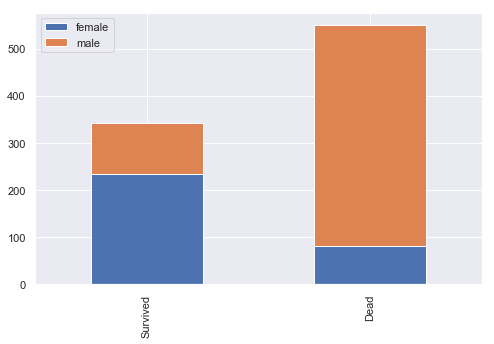

In [176]:
bar_chart_survived(Columns.Sex)

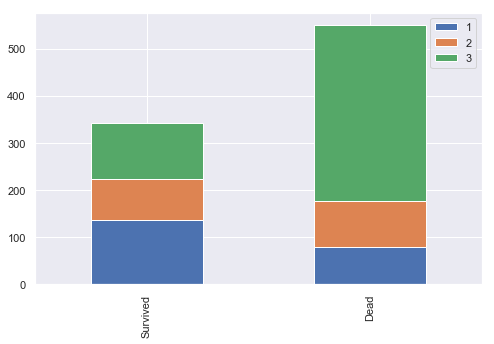

In [177]:
bar_chart_survived(Columns.Pclass)

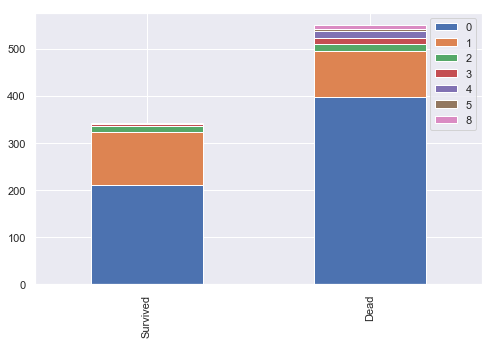

In [178]:
bar_chart_survived(Columns.SibSp)

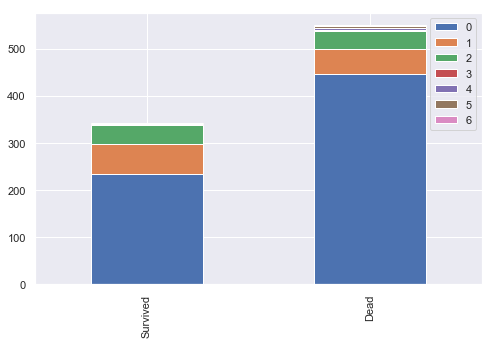

In [179]:
bar_chart_survived(Columns.Parch)

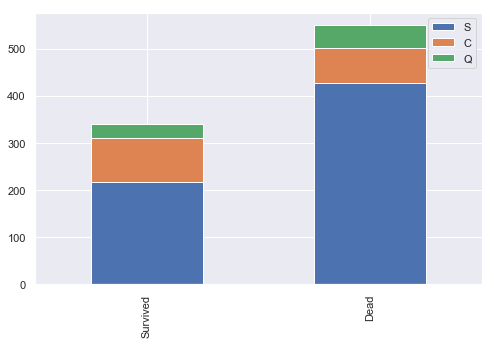

In [180]:
bar_chart_survived(Columns.Embarked)

## 데이터 특성 확인

In [181]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lewy, Mr. Ervin G",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 데이터 가공

- Cabin, Ticket 삭제
- Age : null 제거
- Embarked : 숫자로 변경

Cabin, Ticket 항목 삭제

In [182]:
train = train.drop([Columns.Cabin], axis=1)
test = test.drop([Columns.Cabin], axis=1)

train = train.drop([Columns.Ticket], axis=1)
test = test.drop([Columns.Ticket], axis=1)

In [183]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Embarked 중 null 항목을 제거

In [184]:
most_embarked_label = train[Columns.Embarked].value_counts().index[0]
train = train.fillna({Columns.Embarked : most_embarked_label})
most_embarked_label = test[Columns.Embarked].value_counts().index[0]
test = test.fillna({Columns.Embarked : most_embarked_label})
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Lewy, Mr. Ervin G",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [185]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Pedersen, Mr. Olaf",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,31.500000,NaN


Embarked 항목을 숫자로 변경한다.(문자열은 모두 숫자 값으로 변경해야 한다.)

In [186]:
print(train[Columns.Embarked].value_counts().index)
embarked_mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
train[Columns.Embarked] = train[Columns.Embarked].map(embarked_mapping)
test[Columns.Embarked] = test[Columns.Embarked].map(embarked_mapping)

Index(['S', 'C', 'Q'], dtype='object')


In [187]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [188]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,1


Name에서 호칭을 추출해서 새 항목(Title)을 추가한다.

In [189]:
combine = [train, test]
for dataset in combine:
    dataset[Columns.Title] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
'''
crosstab : 두개 이상의 factor에 대해 교차 분석표를 생성한다.
'''
pd.crosstab(train[Columns.Title], train[Columns.Sex])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


생성한 Title들을 비슷한 것들을 모아 정리한다.

In [190]:
for dataset in combine:
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mlle'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Ms'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mme'], 'Mrs')

train[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.285714
Royal,1.000000


In [191]:
pd.crosstab(train[Columns.Title], train[Columns.Survived]) # 앞이 데이터 뒤가 column

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,6
Royal,0,2


In [192]:
"""
Title을 수가 가장 많은 순서대로 오름차순으로 숫자로 변환한다.
"""
idxs = train[Columns.Title].value_counts().index # Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
title_mapping = {}
for i in range(len(idxs)):
    title_mapping[idxs[i]] = i + 1

# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

for dataset in combine:
    dataset[Columns.Title] = dataset[Columns.Title].map(title_mapping)
    dataset[Columns.Title] = dataset[Columns.Title].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


Name과 PassengerId 삭제

In [193]:
train = train.drop([Columns.Name, Columns.PassengerId], axis=1)
test_passenger_id = test[Columns.PassengerId] # 나중에 test로 예측한 후 PassengerId를 붙여서 제출해야 하므로 삭제 전에 백업해 둔다.
test = test.drop([Columns.Name, Columns.PassengerId], axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [194]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,3,1
1,3,female,47.0,1,0,7.0000,1,3
2,2,male,62.0,0,0,9.6875,3,1
3,3,male,27.0,0,0,8.6625,1,1
4,3,female,22.0,1,1,12.2875,1,3


Sex도 숫자로 변경한다.

In [195]:
mapping = {"male" : 0, "female":1}
train[Columns.Sex] = train[Columns.Sex].map(mapping)
test[Columns.Sex] = test[Columns.Sex].map(mapping)

In [196]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [197]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,3,1
1,3,1,47.0,1,0,7.0000,1,3
2,2,0,62.0,0,0,9.6875,3,1
3,3,0,27.0,0,0,8.6625,1,1
4,3,1,22.0,1,1,12.2875,1,3


Age값을 가공한다.

In [198]:
import numpy as np

# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}
'''
비어있는 나이를 채워야 한다.
이전에 생성한 Title로 rough하게 추정해 본다.
'''

def guess_age(row):
    title_age_mapping = {1: 24, 2: 24, 3: 24, 4: 40, 5: 40, 6: 40} # Master, Rare, Royal의 경우 나이가 좀 많지 않을까 추정해 본다.
    return title_age_mapping[row[Columns.Title]]

def fixup_age(df):
    
    for idx, row in df[df[Columns.Age].isnull()].iterrows():
        print("idx:", idx, guess_age(row))
        #nan_rows[Columns.Age][idx] = title_age_mapping[nan_rows[Columns.Title][idx]]
        
        df[Columns.Age, idx] = guess_age(row)
        
    #df[df[Columns.Age].isnull()] = nan_rows
    return df
    
train = fixup_age(train)
#aaa.describe(include='all')
train.head(n=200)

    
    
# for i in range(train.shape[0]):
#     if isnull(train[Columns.Age][i]):
#         pass

idx: 5 24
idx: 17 24
idx: 19 24
idx: 26 24
idx: 28 24
idx: 29 24
idx: 31 24
idx: 32 24
idx: 36 24
idx: 42 24
idx: 45 24
idx: 46 24
idx: 47 24
idx: 48 24
idx: 55 24
idx: 64 24
idx: 65 40
idx: 76 24
idx: 77 24
idx: 82 24
idx: 87 24
idx: 95 24
idx: 101 24
idx: 107 24
idx: 109 24
idx: 121 24
idx: 126 24
idx: 128 24
idx: 140 24
idx: 154 24
idx: 158 24
idx: 159 40
idx: 166 24
idx: 168 24
idx: 176 40
idx: 180 24
idx: 181 24
idx: 185 24
idx: 186 24
idx: 196 24
idx: 198 24
idx: 201 24
idx: 214 24
idx: 223 24
idx: 229 24
idx: 235 24
idx: 240 24
idx: 241 24
idx: 250 24
idx: 256 24
idx: 260 24
idx: 264 24
idx: 270 24
idx: 274 24
idx: 277 24
idx: 284 24
idx: 295 24
idx: 298 24
idx: 300 24
idx: 301 24
idx: 303 24
idx: 304 24
idx: 306 24
idx: 324 24
idx: 330 24
idx: 334 24
idx: 335 24
idx: 347 24
idx: 351 24
idx: 354 24
idx: 358 24
idx: 359 24
idx: 364 24
idx: 367 24
idx: 368 24
idx: 375 24
idx: 384 24
idx: 388 24
idx: 409 24
idx: 410 24
idx: 411 24
idx: 413 24
idx: 415 24
idx: 420 24
idx: 425 24
idx

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,"(Age, 5)",...,"(Age, 832)","(Age, 837)","(Age, 839)","(Age, 846)","(Age, 849)","(Age, 859)","(Age, 863)","(Age, 868)","(Age, 878)","(Age, 888)"
0,0,3,0,22.0,1,0,7.2500,1,1,24,...,24,24,24,24,24,24,24,24,24,24
1,1,1,1,38.0,1,0,71.2833,2,3,24,...,24,24,24,24,24,24,24,24,24,24
2,1,3,1,26.0,0,0,7.9250,1,2,24,...,24,24,24,24,24,24,24,24,24,24
3,1,1,1,35.0,1,0,53.1000,1,3,24,...,24,24,24,24,24,24,24,24,24,24
4,0,3,0,35.0,0,0,8.0500,1,1,24,...,24,24,24,24,24,24,24,24,24,24
5,0,3,0,NaN,0,0,8.4583,3,1,24,...,24,24,24,24,24,24,24,24,24,24
6,0,1,0,54.0,0,0,51.8625,1,1,24,...,24,24,24,24,24,24,24,24,24,24
7,0,3,0,2.0,3,1,21.0750,1,4,24,...,24,24,24,24,24,24,24,24,24,24
8,1,3,1,27.0,0,2,11.1333,1,3,24,...,24,24,24,24,24,24,24,24,24,24
9,1,2,1,14.0,1,0,30.0708,2,3,24,...,24,24,24,24,24,24,24,24,24,24
